# Plotting 3 - More line and bar graphs

Stock market example (continued)
Fire hydrant example

Key ideas:
 - Incorporating simulations
     - Generating with random.choices()
 - Aggregating with quantile() and the axis parameter
 - Aggregating with value_counts()

In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15

In [4]:
import random

# Stock Market Example

In [5]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How do we compute *total gain* for *every year*?

In [8]:
df["total"] = df["return"].cumprod()
#df.head()
df.tail()

,year,return,total
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996
49,2019,1.3149,153.684192
50,2020,1.1840,181.962083
51,2021,1.1059,201.231868


### Assuming you initally invested *1000 dollars in 1970*, what is your *total wealth* in every future year?

In [9]:
starting = 1000
df["wealth"] = df["total"] * starting
df.tail()

,year,return,total,wealth
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230
49,2019,1.3149,153.684192,153684.192143
50,2020,1.1840,181.962083,181962.083497
51,2021,1.1059,201.231868,201231.868140


### How do we create a *line plot* to plot *wealth gain* over the years?

Text(0, 0.5, 'Total wealth ($)')

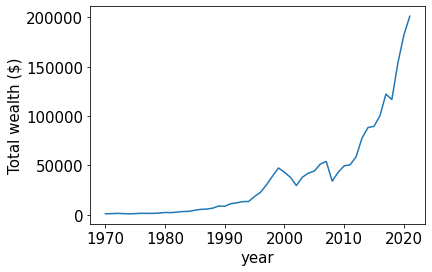

In [10]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Random simulation
- random.choice
- random.choices

In [13]:
random.choice([3,4,5])

4

In [14]:
random.choices([3,4,5], k=10) #sampling with replacement

[3, 3, 3, 5, 5, 3, 4, 4, 4, 5]

### How risky is it in investing in SP500 index going forward?
### Approach:
1. Run simulation, randomly replaying past years.
2. Run hundreds of simulations, explore range of outcomes.

In [23]:
def run_sim(years=10, starting=1000):
    rand_returns = random.choices(df["return"], k=years)
    rand_returns = Series(rand_returns)
    rand_returns = rand_returns.cumprod() * starting
    return rand_returns #actually returning the equivalent of the wealth column

#run_sim()

def run_n_sims(n, years=10, starting=1000):
    sims = pd.DataFrame()
    for i in range(n): #there's probably a more pandas-y way to do this
        sims["sim"+str(i)] = run_sim(years=years, starting=starting)
    return sims

### For *10 years*, run *50 simulations*

In [27]:
sims = run_n_sims(50)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim40,sim41,sim42,sim43,sim44,sim45,sim46,sim47,sim48,sim49
5,2373.468651,1106.679157,3958.727933,2409.833538,1580.217573,3250.291590,2043.626996,1548.615452,930.805317,2103.599700,...,878.581302,1838.319094,1610.924182,2742.177433,2845.783352,382.460246,2437.154567,1521.015308,1891.651993,3090.109561
6,2503.772080,1339.524452,4013.358379,3168.690119,1912.695350,3497.963809,2351.397221,1805.840479,820.132564,2147.985653,...,1040.591694,2038.328212,1733.676604,2892.722974,3032.466740,336.985723,3136.130497,1729.242304,2035.795875,2722.695535
7,1577.376410,1722.360540,4655.495719,3342.651207,1489.989678,4331.878381,2498.829827,1137.679502,1005.154471,2442.044889,...,916.865342,2680.197766,1527.542456,3809.426885,3072.495301,212.301005,4032.436593,1976.696878,2327.118265,2758.635116
8,1909.256407,1469.862485,5428.773558,3820.984595,1811.082453,4118.749965,2856.412375,1560.896276,1057.925081,3088.209967,...,1048.068772,3448.878485,1848.937389,4193.417115,3493.119908,245.823334,4609.478269,1686.913115,2992.208665,3273.672292
9,2003.000897,1566.285464,6171.972658,4525.574154,2484.805126,4432.598712,2651.321967,1646.589482,1280.512518,3153.371197,...,1348.654896,4174.522518,1887.949968,4824.945732,4073.327125,325.445512,5615.727375,1769.740549,4105.310288,3665.203498


### How do we create a *line plot* to visualize all of the simulations?

<AxesSubplot:>

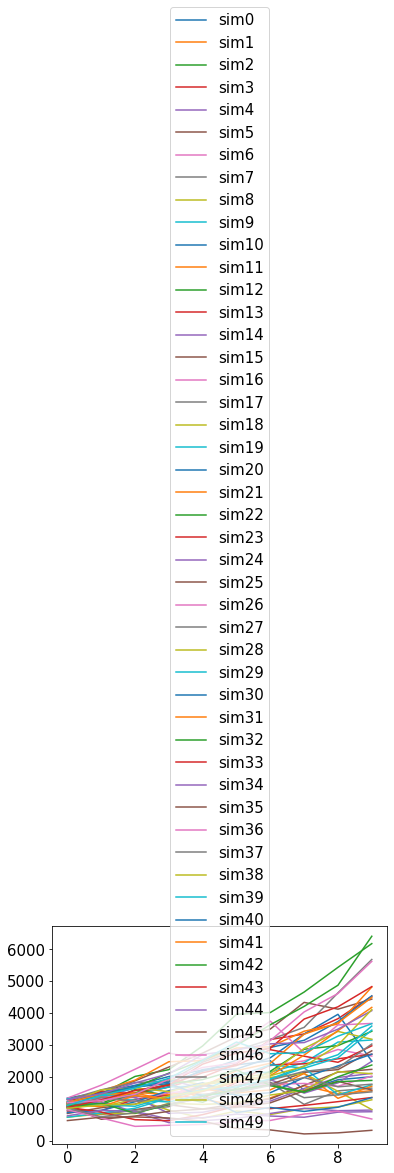

In [28]:
sims.plot.line()

<AxesSubplot:>

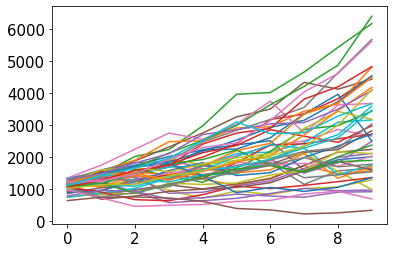

In [29]:
sims.plot.line(legend=False)

### How do we create a *line plot* to present *statistics* of all of the simulations?

### For *10 years*, run *250 simulations*

In [30]:
sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,2555.915506,928.434492,3090.220795,1944.078142,2729.004319,1456.585584,961.166030,930.308410,3093.393920,1891.017045,...,1811.969402,1869.946116,810.804625,2895.671883,1740.807066,1437.527162,3620.268304,1785.204649,3165.363222,1245.628018
6,2959.494565,1230.175702,3283.977639,1514.436872,3246.969339,1791.017634,748.748338,1028.828070,4095.344211,2149.897279,...,1950.041471,2012.436010,863.993409,3445.270407,1763.785720,1373.844708,3819.021034,2187.946818,4221.328392,1713.735028
7,2525.632661,1364.018819,3802.517709,1588.795723,3930.131687,1711.675553,912.200100,1274.100682,4181.755974,2493.880844,...,2098.634631,2383.529210,1058.910322,3490.747976,2029.411849,1602.040315,4069.548814,2308.065098,5227.693081,1736.356330
8,2871.391773,1724.938198,5038.335964,1935.629829,3736.769208,1555.913078,960.090605,1426.483124,3074.845168,3038.295032,...,1322.139817,2668.599303,1287.105496,2979.004323,2135.955971,1531.069929,4556.266852,2691.434711,6820.571163,1093.904488
9,2909.294144,2087.865195,4676.583442,2241.265779,4947.108755,1883.277189,1320.892654,1834.172000,3953.635916,2366.831830,...,1637.337950,3243.682453,1338.718426,3544.419343,2391.416305,964.574055,5406.921873,1695.603868,8255.619335,1153.959844


### Quantile function
- enables to calculate percentiles
- takes as argument a float value between 0 and 1
- defaults to 50th percentile

In [31]:
sims.quantile()

sim0      2234.721231
sim1       975.385957
sim2      2718.404040
sim3      1513.198426
sim4      2443.501178
             ...     
sim245    1214.260766
sim246    3184.675994
sim247    1695.880152
sim248    2949.536789
sim249    1361.739170
Name: 0.5, Length: 250, dtype: float64

In [32]:
sims.quantile(0.5)

sim0      2234.721231
sim1       975.385957
sim2      2718.404040
sim3      1513.198426
sim4      2443.501178
             ...     
sim245    1214.260766
sim246    3184.675994
sim247    1695.880152
sim248    2949.536789
sim249    1361.739170
Name: 0.5, Length: 250, dtype: float64

### How to change *quantile* to compute percentile of *rows*?
- Using axis parameter.
- axis parameter takes a value of 0 or 1.
- axis works for many functions like mean, std, etc.,
- Default value for axis is 0, so that is column computation
- If you want row-wise computation, you will have to set axis to be 1

In [33]:
sims.quantile(0.5, axis=1)

0    1150.600000
1    1273.814250
2    1459.140648
3    1538.174276
4    1694.120895
5    1843.610069
6    1975.132490
7    2256.807001
8    2454.772698
9    2656.741584
Name: 0.5, dtype: float64

<AxesSubplot:>

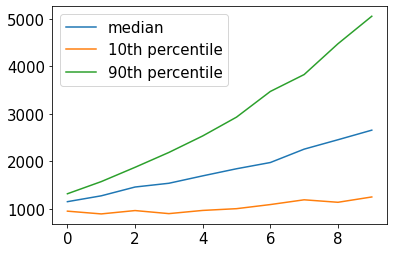

In [36]:
DataFrame({
    "median":sims.quantile(0.5, axis=1),
    "10th percentile":sims.quantile(0.1, axis=1),
    "90th percentile":sims.quantile(0.9, axis=1)
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [43]:
df = pd.read_csv("Fire_Hydrants.csv")
df #.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,-89.439367,43.040481,286329,WUJAG,2018-08-13T18:03:33.000Z,WUJAG,2018-08-13T18:04:02.000Z,HYDR-3964-4053,TC,1-1830-19,...,NaN,WATEROUS,NaN,2018.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10105,-89.426303,43.067854,286330,WUJAG,2018-08-13T18:14:14.000Z,WUJAG,2018-08-13T18:17:45.000Z,HYDR-4253-4054,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10106,-89.445461,43.053305,286729,WUJAG,2018-08-15T16:37:18.000Z,WUJAG,2018-08-15T16:39:24.000Z,HYDR-3859-4055,TC,1-1830-19,...,NaN,WATEROUS,NaN,2000.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN
10107,-89.388849,43.068576,286730,WUJAG,2018-08-15T16:51:54.000Z,WUJAG,2018-08-15T16:59:15.000Z,HYDR-5052-4056,TC,1-1830-19,...,NaN,WATEROUS,NaN,2017.0,5.0,NaN,NaN,NaN,MADISON WATER UTILITY,NaN


In [44]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

Text(0, 0.5, 'Fire hydrant counts by color')

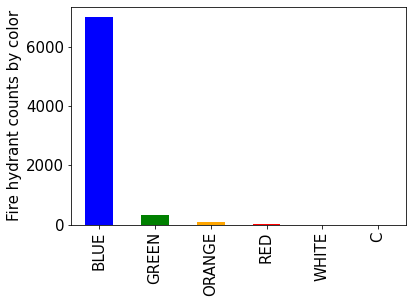

In [54]:
clean_df = df["nozzle_color"].str.upper() #Turn blue, Blue, and BLUE into BLUE, etc
ax = clean_df.value_counts().plot.bar(color=["blue","green","orange","red","black","gray"])
ax.set_ylabel("Fire hydrant counts by color")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

Text(0, 0.5, 'Fire hydrant counts by style')

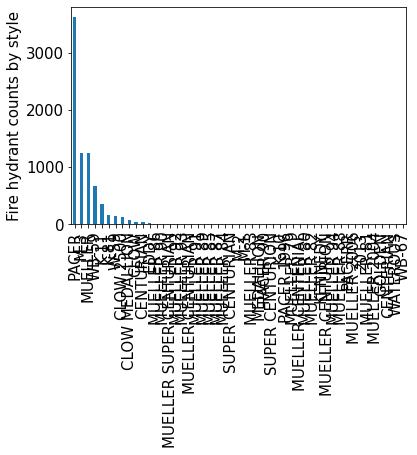

In [55]:
clean_df = df["Style"].str.upper()
ax = clean_df.value_counts().plot.bar()
ax.set_ylabel("Fire hydrant counts by style")

Text(0, 0.5, 'Hydrant counts by style')

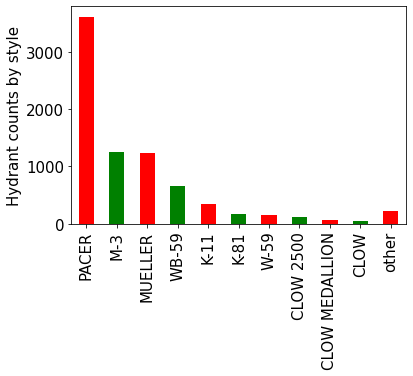

In [59]:
style_counts = clean_df.value_counts()
top10 = style_counts.iloc[:10]
top10
top10["other"] = style_counts.iloc[10:].sum()
ax = top10.plot.bar(color=["r","g"])
ax.set_ylabel("Hydrant counts by style")

### NEXT LECTURE: In what decade were pacers manufactured? .... The last lecture on plotting is coming!